## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
# Load the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import matplotlib.style as style
from matplotlib.lines import Line2D
%matplotlib inline
import random
import sqlite3
from IPython.display import Image
from matplotlib.pyplot import show,figure,subplot
from matplotlib import dates as dates
from scipy import stats
from scipy.stats import kurtosis, skew
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
from sklearn.model_selection import train_test_split
#other datavisualization libraries
import seaborn as sns
from seaborn import lmplot
#stop the deprecation warning from popping up
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

LOADING DATA

In [2]:
#creating a function to load data
def load_data(path,data_format):
    #if loop to differentiate data format
    if data_format.lower() == "csv":
        data =pd.read_csv(path)
        
        return data      

# LOADING DATA FOR THE BOM_MOVIES

In [3]:
#calling the function to load the data
bom =pd.read_csv("zippedData/bom.movie_gross.csv.gz")
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
bom.shape

(3387, 5)

In [5]:
bom.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


# LOADING DATA FOR MOVIE_BUDGETS

In [6]:
#calling the function to load the data
budget =pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# converting budget data into integerDtype

In [7]:
#converting to integerDtype
def convert_price(budget,column_list):
    budget[column_list]=budget[column_list].str.replace('$','')
    budget[column_list]=budget[column_list].str.replace(',','')
    budget[column_list]=budget[column_list].astype('float')
    return budget[column_list]
    

In [8]:
convert_price(budget,'production_budget')

0       425000000.0
1       410600000.0
2       350000000.0
3       330600000.0
4       317000000.0
           ...     
5777         7000.0
5778         6000.0
5779         5000.0
5780         1400.0
5781         1100.0
Name: production_budget, Length: 5782, dtype: float64

In [9]:
convert_price(budget,'domestic_gross')

0       760507625.0
1       241063875.0
2        42762350.0
3       459005868.0
4       620181382.0
           ...     
5777            0.0
5778        48482.0
5779         1338.0
5780            0.0
5781       181041.0
Name: domestic_gross, Length: 5782, dtype: float64

In [10]:
convert_price(budget,'worldwide_gross')

0       2.776345e+09
1       1.045664e+09
2       1.497624e+08
3       1.403014e+09
4       1.316722e+09
            ...     
5777    0.000000e+00
5778    2.404950e+05
5779    1.338000e+03
5780    0.000000e+00
5781    1.810410e+05
Name: worldwide_gross, Length: 5782, dtype: float64

# DATA UNDERSTANDING FOR BOM MOVIES

In [11]:
#general description for the data
def general_description(data):
    output=data.info()
    return output

In [12]:
#general description of the movie data
general_description(bom)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


statistical description

In [13]:
#general description
bom.describe(include = "all")

,title,studio,domestic_gross,foreign_gross,year
count,3387,3382,3.359000e+03,2037,3387.000000
unique,3386,257,NaN,1204,NaN
top,Bluebeard,IFC,NaN,1200000,NaN
freq,2,166,NaN,23,NaN
mean,NaN,NaN,2.874585e+07,NaN,2013.958075
std,NaN,NaN,6.698250e+07,NaN,2.478141
min,NaN,NaN,1.000000e+02,NaN,2010.000000
25%,NaN,NaN,1.200000e+05,NaN,2012.000000
50%,NaN,NaN,1.400000e+06,NaN,2014.000000
75%,NaN,NaN,2.790000e+07,NaN,2016.000000


In [14]:
bom.nunique()

title             3386
studio             257
domestic_gross    1797
foreign_gross     1204
year                 9
dtype: int64

# DATA CLEANING

# missing values

In [15]:
bom.isna()

,title,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3382,False,False,False,True,False
3383,False,False,False,True,False
3384,False,False,False,True,False
3385,False,False,False,True,False


In [16]:
bom.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [17]:
def coerce_df_columns_to_numeric(df,column_list):
    df[column_list]= df[column_list].apply(pd.to_numeric, errors='coerce')
    return df[column_list]

In [18]:
coerce_df_columns_to_numeric(bom,'foreign_gross')

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3382            NaN
3383            NaN
3384            NaN
3385            NaN
3386            NaN
Name: foreign_gross, Length: 3387, dtype: float64

In [19]:
#average mean of foreign_gross that has null values
foreign_mean=bom.foreign_gross.mean()
foreign_mean

75057041.62549213

In [20]:
#dealing with the mode
foreign_mode=bom.foreign_gross.mode()
foreign_mode


0    1200000.0
dtype: float64

In [21]:
#dealing with the median
foreign_median=bom.foreign_gross.mode()
foreign_median

0    1200000.0
dtype: float64

In [22]:
#replacing null values in foreign_gross columns
bom.foreign_gross.fillna(foreign_median, inplace=True)

In [23]:
#dropping coluns
bom.dropna(inplace = True)
bom.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [24]:
#defining outlier method
def find_outlier(data):
    q3=data.quantile(0.75)
    q1=data.quantile(0.25)
    iqr=q3-q1
    outliers = data[((data<(q1-1.5*iqr)) | (data>(q3+1.5*iqr)))]
    return outliers

In [25]:
find_outlier(bom)

,title,studio,domestic_gross,foreign_gross,year
0,NaN,NaN,415000000.0,652000000.0,NaN
1,NaN,NaN,334200000.0,691300000.0,NaN
2,NaN,NaN,296000000.0,664300000.0,NaN
3,NaN,NaN,292600000.0,535700000.0,NaN
4,NaN,NaN,238700000.0,513900000.0,NaN
...,...,...,...,...,...
3275,NaN,NaN,NaN,NaN,NaN
3286,NaN,NaN,NaN,NaN,NaN
3309,NaN,NaN,NaN,NaN,NaN
3342,NaN,NaN,NaN,NaN,NaN


In [26]:
find_outlier(bom.domestic_gross).count()

178

In [27]:
find_outlier(bom.foreign_gross).count()

253

# DATA UNDERSTANDING FOR BUDGET MOVIES

In [28]:
#general description pf the data
def general_description(data):
    output=data.info()
    return output

In [29]:
#general description of the movie data
general_description(budget)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


STATISTICAL DESCRIPTION

In [30]:
#general description
budget.describe(include = "all")

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5782,5782,5.782000e+03,5.782000e+03,5.782000e+03
unique,NaN,2418,5698,NaN,NaN,NaN
top,NaN,"Dec 31, 2014",King Kong,NaN,NaN,NaN
freq,NaN,24,3,NaN,NaN,NaN
mean,50.372363,NaN,NaN,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,NaN,NaN,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,NaN,NaN,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,NaN,NaN,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,NaN,NaN,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,NaN,NaN,4.000000e+07,5.234866e+07,9.764584e+07


In [31]:
budget.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [32]:
budget.nunique()

id                    100
release_date         2418
movie                5698
production_budget     509
domestic_gross       5164
worldwide_gross      5356
dtype: int64

# DATA CLEANING

In [33]:
#looking for null values
budget.isna()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
5777,False,False,False,False,False,False
5778,False,False,False,False,False,False
5779,False,False,False,False,False,False
5780,False,False,False,False,False,False


In [34]:
#summing the null values
budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

# converting columns to numeric dtypes

In [35]:
#defining a method to conver columns to numeric dtypes
def coerce_df_columns_to_numeric(df,column_list):
    df[column_list]= df[column_list].apply(pd.to_numeric, errors='coerce')
    return df[column_list]

In [36]:
coerce_df_columns_to_numeric(budget,'worldwide_gross')

0       2.776345e+09
1       1.045664e+09
2       1.497624e+08
3       1.403014e+09
4       1.316722e+09
            ...     
5777    0.000000e+00
5778    2.404950e+05
5779    1.338000e+03
5780    0.000000e+00
5781    1.810410e+05
Name: worldwide_gross, Length: 5782, dtype: float64

In [37]:
coerce_df_columns_to_numeric(budget,'domestic_gross')

0       760507625.0
1       241063875.0
2        42762350.0
3       459005868.0
4       620181382.0
           ...     
5777            0.0
5778        48482.0
5779         1338.0
5780            0.0
5781       181041.0
Name: domestic_gross, Length: 5782, dtype: float64

In [38]:
coerce_df_columns_to_numeric(budget,'production_budget')

0       425000000.0
1       410600000.0
2       350000000.0
3       330600000.0
4       317000000.0
           ...     
5777         7000.0
5778         6000.0
5779         5000.0
5780         1400.0
5781         1100.0
Name: production_budget, Length: 5782, dtype: float64

In [39]:
#average mean of domestic_gross that has null values
domestic_mean=budget.domestic_gross.mean()
domestic_mean

41873326.867001034

In [40]:
#dealing with the mode
world_mode=budget.worldwide_gross.mode()
world_mode

0    0.0
dtype: float64

In [41]:
#dealing with the median
production_median=budget.production_budget.median()
production_median

17000000.0

In [42]:
#dealing with the median
world_median=budget.worldwide_gross.median()
world_median

27984448.5

In [43]:
#deaking with the mean
world_mean=budget.worldwide_gross.mean()
world_mean

91487460.90643376

In [44]:
#replacing null values in foreign_gross columns
budget.worldwide_gross.fillna(world_median, inplace=True)

In [45]:
#dropping coluns
budget.dropna(inplace = True)
budget.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [46]:
#defining outlier method
def find_outlier(data):
    q3=data.quantile(0.75)
    q1=data.quantile(0.25)
    iqr=q3-q1
    outliers = data[((data<(q1-1.5*iqr)) | (data>(q3+1.5*iqr)))]
    return outliers

In [47]:
find_outlier(budget)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,NaN,NaN,NaN,425000000.0,760507625.0,2.776345e+09
1,NaN,NaN,NaN,410600000.0,241063875.0,1.045664e+09
2,NaN,NaN,NaN,350000000.0,NaN,NaN
3,NaN,NaN,NaN,330600000.0,459005868.0,1.403014e+09
4,NaN,NaN,NaN,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,NaN,NaN,NaN,NaN,NaN,NaN
5778,NaN,NaN,NaN,NaN,NaN,NaN
5779,NaN,NaN,NaN,NaN,NaN,NaN
5780,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
find_outlier(budget.domestic_gross).count()

463

In [49]:
find_outlier(budget.production_budget).count()

431

In [50]:
find_outlier(budget.worldwide_gross).count()

604

# DATA ANALYSIS FOR BOM_MOVIES

EXPLARATORY DATA ANALYSIS


# UNIVARIATE
#numerical

In [51]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2002 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2002 non-null   object 
 1   studio          2002 non-null   object 
 2   domestic_gross  2002 non-null   float64
 3   foreign_gross   2002 non-null   float64
 4   year            2002 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 93.8+ KB


categorical

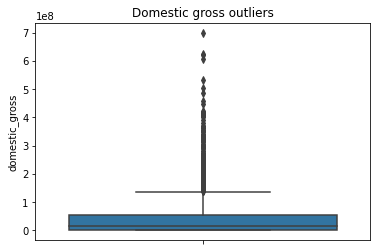

In [52]:
#checking outliers for domestic gross column in bom_movie dataset
fig, ax = plt.subplots()
sns.boxplot(y = bom.domestic_gross)
ax.set_title("Domestic gross outliers")
plt.show()

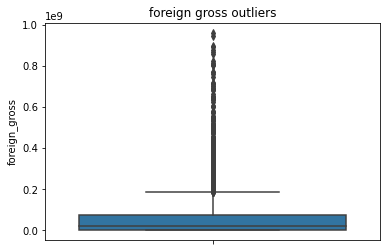

In [53]:
#checking outliers for domestic gross column in bom_movie dataset
fig, ax = plt.subplots()
sns.boxplot(y = bom.foreign_gross)
ax.set_title("foreign gross outliers")
plt.show()

# checking for outliers in bom_movies

In [54]:
#defining outlier method
def find_outlier(data):
    q3=data.quantile(0.75)
    q1=data.quantile(0.25)
    iqr=q3-q1
    outliers = data[((data<(q1-1.5*iqr)) | (data>(q3+1.5*iqr)))]
    return outliers

In [55]:
find_outlier(bom.domestic_gross).count()

178

In [56]:
find_outlier(bom.foreign_gross).count()

253

#checking outliers for foreign gross column in bom_movie dataset
fig, ax = plt.subplots()
sns.boxplot(y = bom.foreign_gross)
ax.set_title("Foreign gross outliers")
plt.show()

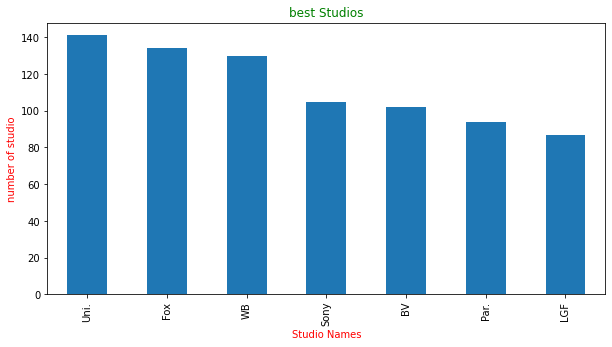

In [57]:
#Finding the studios that are leading 
fig,ax = plt.subplots(figsize = (10,5))
bom.studio.value_counts().head(7).plot.bar()
plt.xlabel("Studio Names",c = "r")
plt.ylabel("number of studio",c ="r")
plt.title("best Studios",color= "g");


# statistical summary for bom_movies

In [58]:
bom.describe(include='all')

,title,studio,domestic_gross,foreign_gross,year
count,2002,2002,2.002000e+03,2.002000e+03,2002.000000
unique,2002,172,NaN,NaN,NaN
top,We Need to Talk About Kevin,Uni.,NaN,NaN,NaN
freq,1,141,NaN,NaN,NaN
mean,NaN,NaN,4.571529e+07,7.597967e+07,2013.500000
std,NaN,NaN,7.640004e+07,1.383001e+08,2.597475
min,NaN,NaN,4.000000e+02,6.000000e+02,2010.000000
25%,NaN,NaN,6.655000e+05,4.000000e+06,2011.000000
50%,NaN,NaN,1.640000e+07,1.960000e+07,2013.000000
75%,NaN,NaN,5.570000e+07,7.645000e+07,2016.000000


In [59]:
bom.describe()

,domestic_gross,foreign_gross,year
count,2.002000e+03,2.002000e+03,2002.000000
mean,4.571529e+07,7.597967e+07,2013.500000
std,7.640004e+07,1.383001e+08,2.597475
min,4.000000e+02,6.000000e+02,2010.000000
25%,6.655000e+05,4.000000e+06,2011.000000
50%,1.640000e+07,1.960000e+07,2013.000000
75%,5.570000e+07,7.645000e+07,2016.000000
max,7.001000e+08,9.605000e+08,2018.000000


Measure of central tendancies for bom_movie dataset

In [60]:

# Mean
def mean(data):
    output = sum(data) / len(data)
    return output

# mean of domestic gross in df
print(mean(bom.domestic_gross))

# mean of foreign gross in bom_movie
print(mean(bom.foreign_gross))

45715294.34815185
75979668.67282717


#finding median

In [61]:
 
def median(data):
    data_sorted = sorted(data)
    length_of_data = len(data_sorted)
    middle_number = (length_of_data - 1) // 2
    if middle_number % 2:
        return data_sorted[middle_number]
    else:
        return (data_sorted[middle_number] + data_sorted[middle_number + 1]) / 2.0
    

# median of domestic gross in bom_movie
print(median(bom.domestic_gross))

# mean of foreign gross in bom_movie
print(median(bom.foreign_gross))

16399999.0
19600000.0


In [62]:
# Mode
print(bom.domestic_gross.mode())
print(bom.foreign_gross.mode())
print(bom.studio.mode())
print(bom.year.mode())
print(bom.title.mode())

0    1500000.0
dtype: float64
0    1200000.0
dtype: float64
0    Uni.
dtype: object
0    2010
dtype: int64
0                                  '71
1                  10 Cloverfield Lane
2                          102 Not Out
3                             11-11-11
4                            12 Strong
                     ...              
1997                       Zoolander 2
1998                          Zootopia
1999                           [Rec] 2
2000                           mother!
2001    xXx: The Return of Xander Cage
Length: 2002, dtype: object


In [63]:
# Range
print(bom.domestic_gross.max() - bom.domestic_gross.min())
print(bom.foreign_gross.max() - bom.foreign_gross.min())

700099600.0
960499400.0


In [64]:
# standard deviation
print("domestic_gross standard deviation:", bom.domestic_gross.std())
print("foreign_gross standard deviation:", bom.foreign_gross.std())   

domestic_gross standard deviation: 76400042.47678912
foreign_gross standard deviation: 138300072.9817867


In [65]:
# Variance
print("domestic_gross variance:", bom.domestic_gross.var())
print("foreign_gross variance:", bom.foreign_gross.var()) 

domestic_gross variance: 5836966490455182.0
foreign_gross variance: 1.9126910186767524e+16


In [66]:
# quantiles
print('The quantiles of domestic_gross: \n' +str(bom.domestic_gross.quantile([0.25,0.5,0.75])))
print('The quantiles of foreign_domestic: \n' +str(bom.foreign_gross.quantile([0.25,0.5,0.75])))

# The quantiles of bluecars taken and those returned are similar.
# The quantiles of slots taken and those freed are also similar.

The quantiles of domestic_gross: 
0.25      665500.0
0.50    16399999.0
0.75    55700000.0
Name: domestic_gross, dtype: float64
The quantiles of foreign_domestic: 
0.25     4000000.0
0.50    19600000.0
0.75    76450000.0
Name: foreign_gross, dtype: float64


In [67]:
# skewness
print('The skewness of domestic_gross: ' +str(bom.domestic_gross.skew()))
print('The skewness of foreign_gross: ' +str(bom.foreign_gross.skew()))


# The positive values indicates that the tail of the data is right-skewed.

The skewness of domestic_gross: 3.227680661937993
The skewness of foreign_gross: 3.0667438949171353


In [68]:
# kurtosis
print('The kurtosis of domestic_gross: ' +str(bom.domestic_gross.kurt()))
print('The kurtosis of foreign_gross: ' +str(bom.foreign_gross.kurt()))


# The data has positive kurtosis indicating that the distribution has heavier tails 
# and a taller peak than the normal distribution. 

The kurtosis of domestic_gross: 14.063948767296893
The kurtosis of foreign_gross: 10.674168641009764


C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


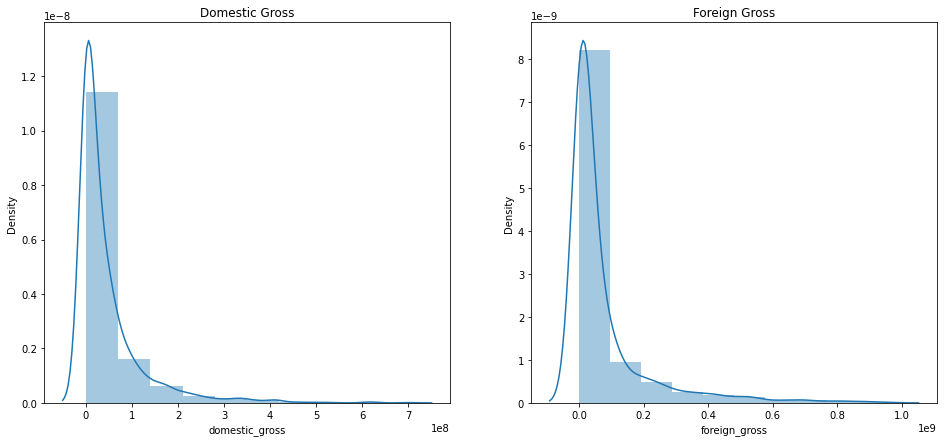

In [69]:
# Plotting a histogram to show skewness
n_bins = 10
fig, (ax1,ax2) = plt.subplots(1,2, figsize= (16,7))
sns.distplot(bom.domestic_gross, ax=ax1, bins= n_bins)
sns.distplot(bom.foreign_gross, ax=ax2, bins= n_bins)
ax1.set_title('Domestic Gross')
ax2.set_title('Foreign Gross');

# DATA ANALYSIS FOR BUDGET_MOVIES

EXPLARATORY DATA ANALYSIS

UNIVARIATE


# numerical

In [70]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 316.2+ KB


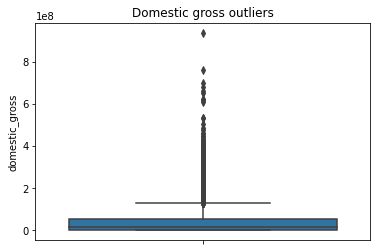

In [71]:
#checking outliers for domestic gross column in budget_movie dataset
fig, ax = plt.subplots()
sns.boxplot(y = budget.domestic_gross)
ax.set_title("Domestic gross outliers")
plt.show()

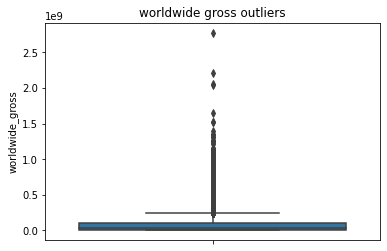

In [72]:
#checking outliers for worldwide gross column in budget_movie dataset
fig, ax = plt.subplots()
sns.boxplot(y = budget.worldwide_gross)
ax.set_title("worldwide gross outliers")
plt.show()

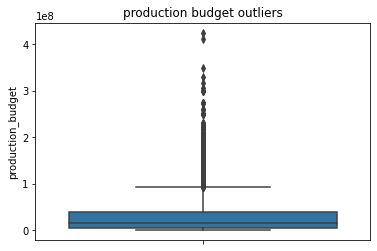

In [73]:
#checking outliers for production_budget column in budget_movie dataset
fig, ax = plt.subplots()
sns.boxplot(y = budget.production_budget)
ax.set_title("production budget outliers")
plt.show()

# checking for outliers in budget_moviess

In [74]:
#defining outlier method
def find_outlier(data):
    q3=data.quantile(0.75)
    q1=data.quantile(0.25)
    iqr=q3-q1
    outliers = data[((data<(q1-1.5*iqr)) | (data>(q3+1.5*iqr)))]
    return outliers

In [75]:
find_outlier(budget.domestic_gross).count()

463

In [76]:
find_outlier(budget.production_budget).count()

431

In [77]:
find_outlier(budget.worldwide_gross).count()

604

# categorical

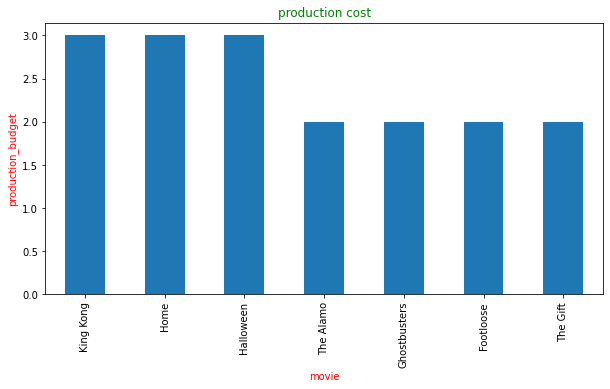

In [78]:
#comparing production cost amongest different studios
fig,ax = plt.subplots(figsize = (10,5))
budget.movie.value_counts().head(7).plot.bar()
plt.xlabel("movie",c = "r")
plt.ylabel("production_budget",c ="r")
plt.title("production cost",color= "g");

# statistical summary

In [79]:
budget.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [80]:
budget.describe(include='all')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5782,5782,5.782000e+03,5.782000e+03,5.782000e+03
unique,NaN,2418,5698,NaN,NaN,NaN
top,NaN,"Dec 31, 2014",King Kong,NaN,NaN,NaN
freq,NaN,24,3,NaN,NaN,NaN
mean,50.372363,NaN,NaN,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,NaN,NaN,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,NaN,NaN,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,NaN,NaN,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,NaN,NaN,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,NaN,NaN,4.000000e+07,5.234866e+07,9.764584e+07


In [81]:
# Mean
def mean(data):
    output = sum(data) / len(data)
    return output

# mean of domestic gross in budget
print(mean(budget.domestic_gross))

# mean of worldwide gross in budget_movies
print(mean(budget.worldwide_gross))

#mean of production budget in budget_movies
print(mean(budget.production_budget))


41873326.867001034
91487460.90643376
31587757.0965064


In [82]:
def median(data):
    data_sorted = sorted(data)
    length_of_data = len(data_sorted)
    middle_number = (length_of_data - 1) // 2
    if middle_number % 2:
        return data_sorted[middle_number]
    else:
        return (data_sorted[middle_number] + data_sorted[middle_number + 1]) / 2.0
    

# median of domestic gross in budget_movie
print(median(budget.domestic_gross))

# mean of foreign gross in budget_movie
print(median(budget.worldwide_gross))

#mean of production budget in budget_movie
print(median(budget.production_budget))


17225945.0
27984448.5
17000000.0


In [83]:
# Mode
print(budget.domestic_gross.mode())
print(budget.worldwide_gross.mode())
print(budget.production_budget.mode())
print(budget.movie.mode())

0    0.0
dtype: float64
0    0.0
dtype: float64
0    20000000.0
dtype: float64
0    Halloween
1         Home
2    King Kong
dtype: object


In [84]:
# Range
print(budget.domestic_gross.max() - budget.domestic_gross.min())
print(budget.worldwide_gross.max() - budget.worldwide_gross.min())
print(budget.production_budget.max()-budget.production_budget.min())

936662225.0
2776345279.0
424998900.0


In [85]:
# standard deviation
print("domestic_gross standard deviation:", budget.domestic_gross.std())
print("worldwide_gross standard deviation:", budget.worldwide_gross.std()) 
print("production_budget standard deviation:", budget.production_budget.std()) 


domestic_gross standard deviation: 68240597.35690415
worldwide_gross standard deviation: 174719968.77890477
production_budget standard deviation: 41812076.82694309


In [86]:
# Variance
print("domestic_gross variance:", budget.domestic_gross.var())
print("worldwide_gross variance:", budget.worldwide_gross.var()) 
print("production_budget variance:",budget.production_budget.var())

domestic_gross variance: 4656779127627114.0
worldwide_gross variance: 3.052706749010146e+16
production_budget variance: 1748249768582191.8


In [87]:
# quantiles
print('The quantiles of domestic_gross: \n' +str(budget.domestic_gross.quantile([0.25,0.5,0.75])))
print('The quantiles of worldwide_gross: \n' +str(budget.worldwide_gross.quantile([0.25,0.5,0.75])))
print('The quantiles of production_budget: \n' +str(budget.production_budget.quantile([0.25,0.5,0.75])))

# There are no similar quantiles

The quantiles of domestic_gross: 
0.25     1429534.5
0.50    17225945.0
0.75    52348661.5
Name: domestic_gross, dtype: float64
The quantiles of worldwide_gross: 
0.25     4125414.75
0.50    27984448.50
0.75    97645836.50
Name: worldwide_gross, dtype: float64
The quantiles of production_budget: 
0.25     5000000.0
0.50    17000000.0
0.75    40000000.0
Name: production_budget, dtype: float64


In [88]:
# skewness
print('The skewness of domestic_gross: ' +str(budget.domestic_gross.skew()))
print('The skewness of worldwide_gross: ' +str(budget.worldwide_gross.skew()))
print('The skewness of production_budget: ' +str(budget.production_budget.skew()))


# The positive values indicates that the tail of the data is right-skewed.

The skewness of domestic_gross: 3.7589273318288816
The skewness of worldwide_gross: 4.4914494627865444
The skewness of production_budget: 2.718373312433728


In [89]:
# kurtosis
print('The kurtosis of domestic_gross: ' +str(budget.domestic_gross.kurt()))
print('The kurtosis of worldwide_gross: ' +str(budget.worldwide_gross.kurt()))
print('The kurtosis of production_budget: ' +str(budget.production_budget.kurt()))

# The data has positive kurtosis indicating that the distribution has heavier tails 
# and a taller peak than the normal distribution. 

The kurtosis of domestic_gross: 22.41884897792375
The kurtosis of worldwide_gross: 31.92804318445726
The kurtosis of production_budget: 10.285923930107748


C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


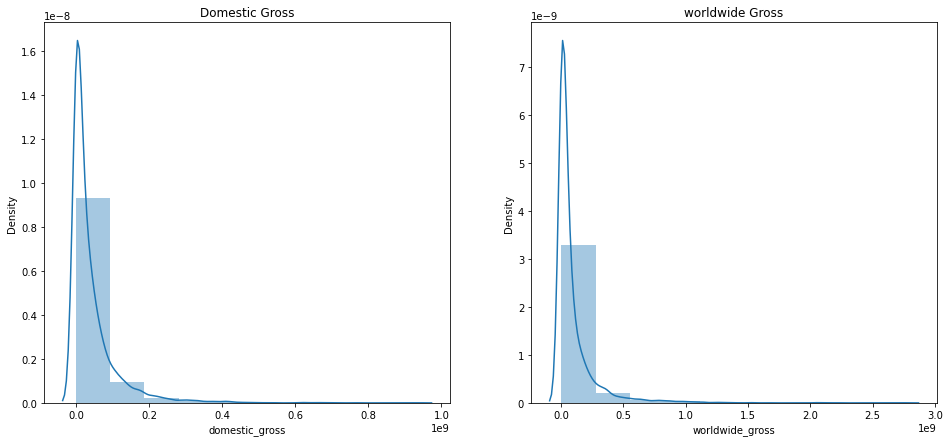

In [90]:
# Plotting a histogram to show skewness
n_bins = 10
fig, (ax1,ax2) = plt.subplots(1,2, figsize= (16,7))
sns.distplot(budget.domestic_gross, ax=ax1, bins= n_bins)
sns.distplot(budget.worldwide_gross, ax=ax2, bins= n_bins)
ax1.set_title('Domestic Gross')
ax2.set_title('worldwide Gross');